# Temp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

Let's make a letter U.

In [23]:
U = np.array([[0,1],[.2,0.8],[.3,1.3],[.1,2.1],[.2,.2],[-0.1,1.7],[.1,.6],[.6,.2],[1.1,0.2],[1.6,0.2],[.8,0],[1,0.3],[2,1.1],[2.1,1.6],[1.9,1.7],[1.8,0.3],[1.95,0.9],[1.5,0.1],[2,2.2]])

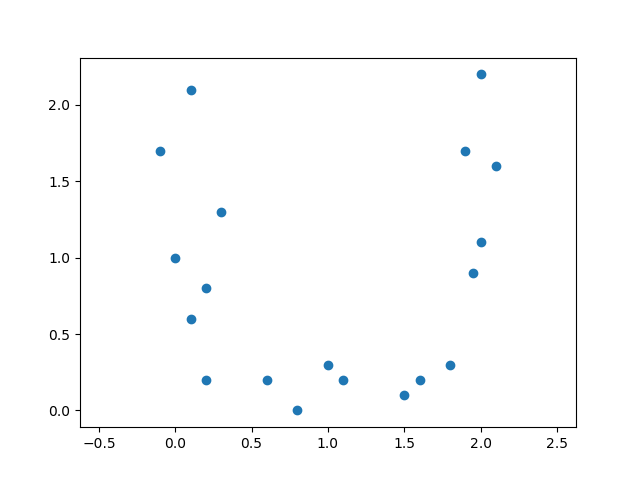

In [24]:
plt.plot(U[:,0],U[:,1],'o')
plt.axis('equal')
plt.show()

Now we'll make a K.

In [47]:
K = np.array([[3,1],[3.2,0.6],[3.3,1.2],[3.1,1.8],[3.15,1.9],[3.1,2.1],[3.2,.2],[2.9,1.6],[3.1,.6],[3.6,.6],[4.1,1.2],[4.6,1.7],[3.3,1.5],[4.8,1.9],[5.1,1.8],[4,1],[4.5,0.7],[4.3,1.35],[4.8,0.2],[5,0.3],[5.1,0.1],[3.6,1],[4.9,2]])

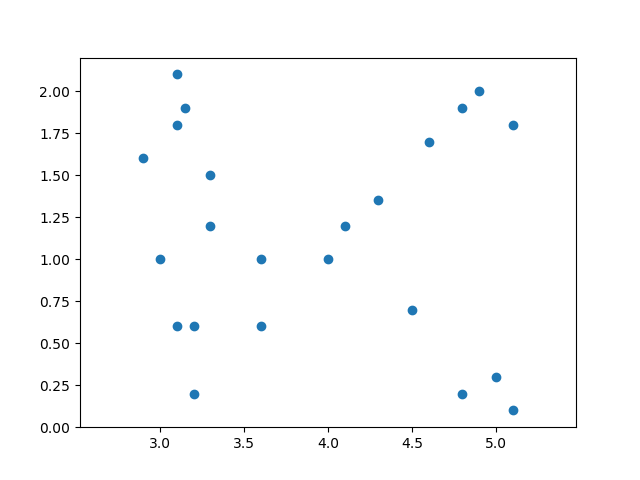

In [48]:
plt.plot(K[:,0],K[:,1],'o')
plt.axis('equal')
plt.show()

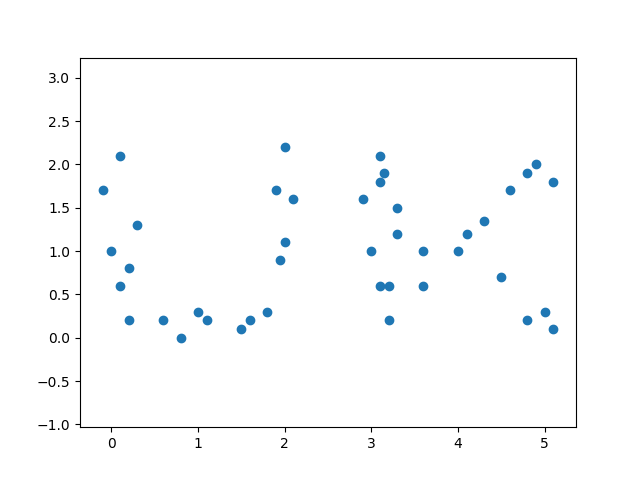

In [49]:
UK = np.concatenate((U,K))
plt.plot(UK[:,0],UK[:,1],'o')
plt.axis('equal')
plt.show()

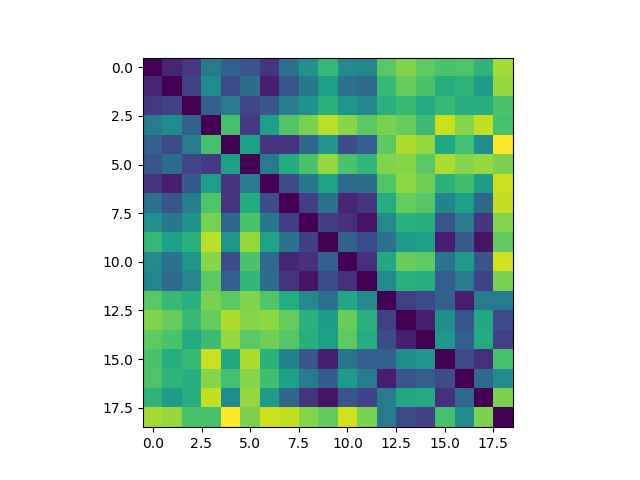

In [51]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(U)
plt.imshow(D)
plt.show()

Now we define a function that will take as input a distance matrix and a parameter $r$ and fill in the edges for the 1-skeleton of $VR(X,r)$.

In [52]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

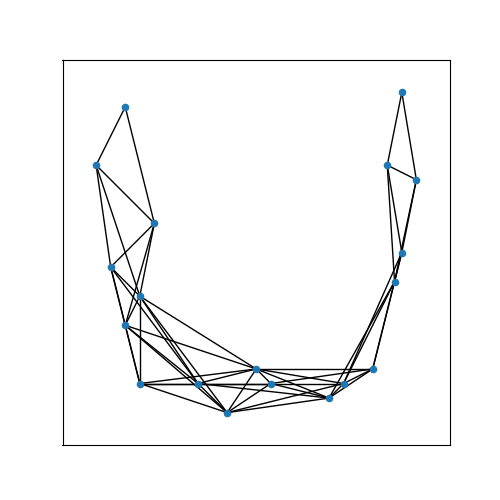

In [53]:
r = 1
G = create_simplicial_complex(D,r)
pos = {n:U[n,:] for n in range(len(U))}
plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
plt.axis('equal')
plt.show()

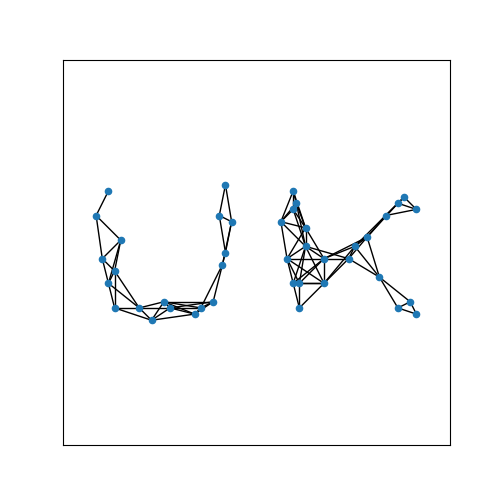

In [56]:
DK = pairwise_distances(UK)
r = 0.8
G = create_simplicial_complex(DK,r)
pos = {n:UK[n,:] for n in range(len(UK))}
plt.figure(figsize = (5,5))
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
plt.axis('equal')
plt.show()

Now let's look at how this evolves over a few radii:

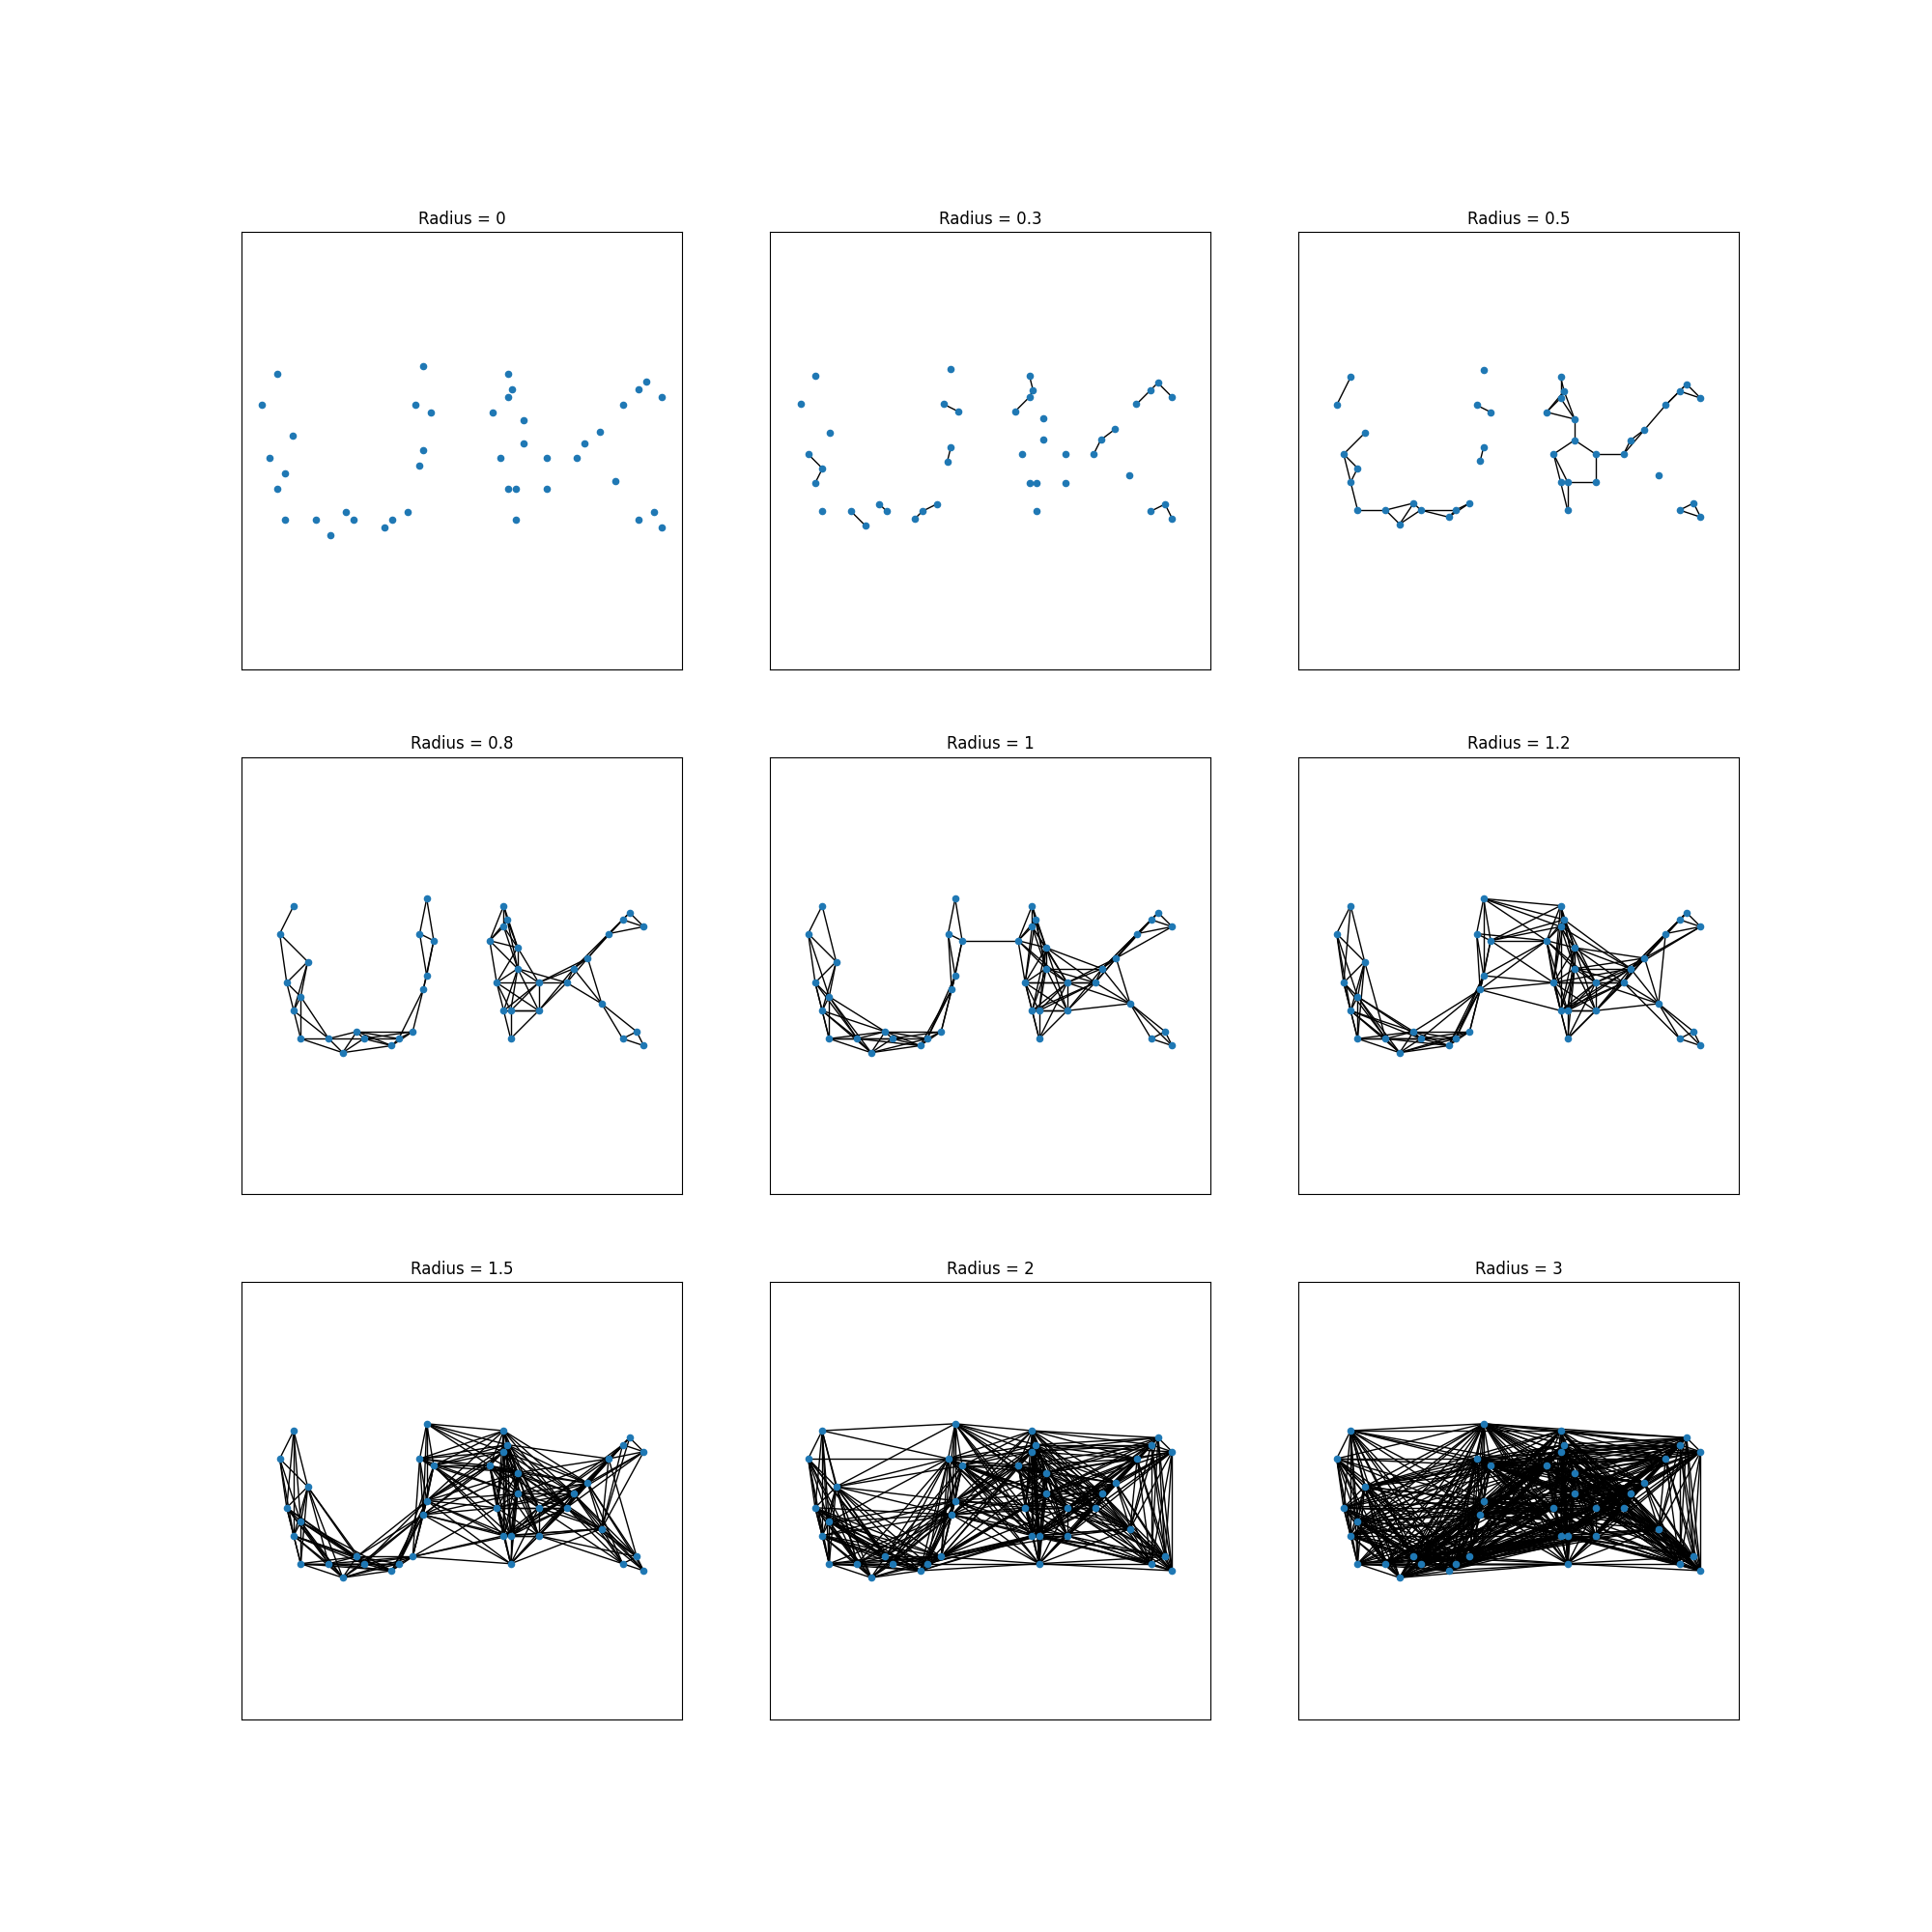

In [61]:
rs = [0,0.3,0.5,0.8,1,1.2,1.5,2,3]

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(DK,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 20)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()